In [ ]:
"""
==================================================
TIMESYNC AI RESEARCH - SMART TIMESHEET PRE-FILL
==================================================
Project: OrasSync 2.0 - Smart Timesheet Pre-fill Feature
Sprint: ML Research Phase
Current Week: 1
Date: February 17, 2026
Notebook: Model Training & Evaluation

📊 PROJECT PHASES:
✅ Phase 1: Data Exploration (COMPLETED)
✅ Phase 2: Feature Engineering (COMPLETED)
🔄 Phase 3: Random Forest Model Training (IN PROGRESS)
⬜ Phase 4: Model Evaluation
⬜ Phase 5: Production Integration

🎯 PHASE 3 DELIVERABLES:
🔄 Train Random Forest classifier (THIS NOTEBOOK)
⬜ Evaluate model performance
⬜ Analyze feature importance
⬜ Save trained model for production

Progress: 25% (1/4 tasks)

🎯 THIS NOTEBOOK'S OBJECTIVES:
1. Load engineered features from Phase 2
2. Split data into training and test sets (70/30)
3. Train Random Forest classifier
4. Evaluate model accuracy and performance
5. Analyze feature importance
6. Save trained model for production use

📚 NOTEBOOK STRUCTURE:
Part 1: Load Engineered Features
Part 2: Train/Test Split & Data Preparation
Part 3: Random Forest Model Training
Part 4: Model Evaluation & Metrics
Part 5: Feature Importance Analysis
Part 6: Model Serialization & Export

✅ SUCCESS CRITERIA:
✅ Achieve >70% prediction accuracy
✅ Identify top predictive features
✅ Save model for production deployment
✅ Generate performance visualizations
✅ Document model parameters

==================================================
"""

In [1]:
# ==================================================
# INSTALL REQUIRED LIBRARIES
# ==================================================
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn joblib -q
print("✅ Libraries installed!")
print("\n" + "=" * 80)

# ==================================================
# IMPORT LIBRARIES
# ==================================================
print("\n" + "=" * 80)
print("📚 IMPORTING LIBRARIES")
print("=" * 80)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("\n✅ All libraries imported successfully!")
print("=" * 80)

# ==================================================
# CREATE OUTPUT DIRECTORIES
# ==================================================
print("\n" + "=" * 80)
print("📁 CREATING OUTPUT DIRECTORIES")
print("=" * 80)

os.makedirs('../models', exist_ok=True)
os.makedirs('../results/model_performance', exist_ok=True)

print("\n✅ Directories created:")
print("   - models/ (for trained models)")
print("   - results/model_performance/ (for evaluation metrics)")
print("=" * 80)

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


✅ Libraries installed!


📚 IMPORTING LIBRARIES

✅ All libraries imported successfully!

📁 CREATING OUTPUT DIRECTORIES

✅ Directories created:
   - models/ (for trained models)
   - results/model_performance/ (for evaluation metrics)


In [2]:
print("\n" + "=" * 80)
print("📚 PART 1: LOAD ENGINEERED FEATURES")
print("=" * 80)


📚 PART 1: LOAD ENGINEERED FEATURES


In [3]:
print("\n" + "=" * 80)
print("EXERCISE 1.1: Load Processed Dataset")
print("=" * 80)

print("\n⏱️ Loading dataset from data/processed/features_engineered.csv...")

# Load the engineered features
df = pd.read_csv('../data/processed/features_engineered.csv')

print("\n✅ Dataset loaded successfully!")
print("=" * 80)

print("\n📊 DATASET OVERVIEW:")
print("=" * 80)
print(f"Total Records: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"Features: {len(df.columns) - 1}")
print(f"Target: 1 (target)")

print("\n📋 COLUMN LIST:")
print("=" * 80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n📊 FIRST 5 RECORDS:")
print("=" * 80)
df.head()


EXERCISE 1.1: Load Processed Dataset

⏱️ Loading dataset from data/processed/features_engineered.csv...

✅ Dataset loaded successfully!

📊 DATASET OVERVIEW:
Total Records: 44
Total Columns: 13
Features: 12
Target: 1 (target)

📋 COLUMN LIST:
 1. day_of_week_encoded
 2. hour_of_day
 3. month
 4. is_month_end
 5. activity_frequency
 6. avg_duration
 7. duration_consistency
 8. recent_trend
 9. total_occurrences
10. is_billable
11. activity_id
12. user_id_encoded
13. target

📊 FIRST 5 RECORDS:


,day_of_week_encoded,hour_of_day,month,is_month_end,activity_frequency,avg_duration,duration_consistency,recent_trend,total_occurrences,is_billable,activity_id,user_id_encoded,target
0,1,23,2,0,0.4000,23.6393,0.3991,0.0,14,1,1,0,1
1,3,10,2,0,0.3636,17.1438,0.4142,0.0,8,1,2,2,1
2,3,21,2,0,0.2727,23.6393,0.3991,0.0,14,1,1,3,1
3,3,12,2,0,0.0909,18.9333,0.5011,0.0,3,0,5,1,0
4,3,12,2,0,0.3636,17.1438,0.4142,0.0,8,1,2,1,1


In [4]:
print("\n" + "=" * 80)
print("EXERCISE 1.2: Validate Data Quality")
print("=" * 80)

print("\n🔍 DATA QUALITY CHECKS:")
print("=" * 80)

# Check for missing values
missing = df.isnull().sum().sum()
print(f"Missing Values: {missing}")

# Check for infinite values
infinite = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Infinite Values: {infinite}")

# Check target distribution
target_dist = df['target'].value_counts()
print(f"\nTarget Distribution:")
print(f"  Class 0 (No): {target_dist.get(0, 0)} ({(target_dist.get(0, 0)/len(df)*100):.1f}%)")
print(f"  Class 1 (Yes): {target_dist.get(1, 0)} ({(target_dist.get(1, 0)/len(df)*100):.1f}%)")

# Check data types
print(f"\nData Types:")
print(df.dtypes)

if missing == 0 and infinite == 0:
    print("\n✅ Data quality: EXCELLENT - No missing or infinite values!")
else:
    print("\n⚠️ Data quality: Issues detected - Clean data before training")

print("=" * 80)


EXERCISE 1.2: Validate Data Quality

🔍 DATA QUALITY CHECKS:
Missing Values: 0
Infinite Values: 0

Target Distribution:
  Class 0 (No): 18 (40.9%)
  Class 1 (Yes): 26 (59.1%)

Data Types:
day_of_week_encoded       int64
hour_of_day               int64
month                     int64
is_month_end              int64
activity_frequency      float64
avg_duration            float64
duration_consistency    float64
recent_trend            float64
total_occurrences         int64
is_billable               int64
activity_id               int64
user_id_encoded           int64
target                    int64
dtype: object

✅ Data quality: EXCELLENT - No missing or infinite values!


In [5]:
print("\n" + "=" * 80)
print("📚 PART 2: TRAIN/TEST SPLIT & DATA PREPARATION")
print("=" * 80)


📚 PART 2: TRAIN/TEST SPLIT & DATA PREPARATION


In [6]:
print("\n" + "=" * 80)
print("EXERCISE 2.1: Split Dataset into Train/Test Sets")
print("=" * 80)

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data (70% train, 30% test)
TEST_SIZE = 0.30
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y  # Maintain class balance in both sets
)

print("\n✅ Dataset split successfully!")
print("=" * 80)

print("\n📊 SPLIT SUMMARY:")
print("=" * 80)
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} ({(len(X_train)/len(X)*100):.1f}%)")
print(f"Test Samples: {len(X_test)} ({(len(X_test)/len(X)*100):.1f}%)")

print("\n🎯 TARGET DISTRIBUTION IN SPLITS:")
print("=" * 80)
train_dist = y_train.value_counts()
test_dist = y_test.value_counts()

print(f"\nTraining Set:")
print(f"  Class 0: {train_dist.get(0, 0)} ({(train_dist.get(0, 0)/len(y_train)*100):.1f}%)")
print(f"  Class 1: {train_dist.get(1, 0)} ({(train_dist.get(1, 0)/len(y_train)*100):.1f}%)")

print(f"\nTest Set:")
print(f"  Class 0: {test_dist.get(0, 0)} ({(test_dist.get(0, 0)/len(y_test)*100):.1f}%)")
print(f"  Class 1: {test_dist.get(1, 0)} ({(test_dist.get(1, 0)/len(y_test)*100):.1f}%)")

print("\n📋 FEATURE NAMES:")
print("=" * 80)
for i, feat in enumerate(X.columns, 1):
    print(f"{i:2d}. {feat}")


EXERCISE 2.1: Split Dataset into Train/Test Sets

✅ Dataset split successfully!

📊 SPLIT SUMMARY:
Total Samples: 44
Training Samples: 30 (68.2%)
Test Samples: 14 (31.8%)

🎯 TARGET DISTRIBUTION IN SPLITS:

Training Set:
  Class 0: 12 (40.0%)
  Class 1: 18 (60.0%)

Test Set:
  Class 0: 6 (42.9%)
  Class 1: 8 (57.1%)

📋 FEATURE NAMES:
 1. day_of_week_encoded
 2. hour_of_day
 3. month
 4. is_month_end
 5. activity_frequency
 6. avg_duration
 7. duration_consistency
 8. recent_trend
 9. total_occurrences
10. is_billable
11. activity_id
12. user_id_encoded


In [7]:
print("\n" + "=" * 80)
print("📚 PART 3: RANDOM FOREST MODEL TRAINING")
print("=" * 80)


📚 PART 3: RANDOM FOREST MODEL TRAINING


In [8]:
print("\n" + "=" * 80)
print("EXERCISE 3.1: Train Random Forest Classifier")
print("=" * 80)

# Define Random Forest parameters
rf_params = {
    'n_estimators': 100,           # Number of trees
    'max_depth': 10,               # Maximum tree depth
    'min_samples_split': 5,        # Min samples to split node
    'min_samples_leaf': 2,         # Min samples in leaf
    'random_state': RANDOM_STATE,
    'class_weight': 'balanced',    # Handle class imbalance
    'n_jobs': -1                   # Use all CPU cores
}

print("\n🌲 RANDOM FOREST PARAMETERS:")
print("=" * 80)
for param, value in rf_params.items():
    print(f"  {param:20s}: {value}")

# Initialize and train model
print("\n⏱️ Training Random Forest model...")
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

print("\n✅ Model trained successfully!")
print("=" * 80)

print("\n📊 MODEL INFO:")
print("=" * 80)
print(f"Number of Trees: {rf_model.n_estimators}")
print(f"Number of Features: {rf_model.n_features_in_}")
print(f"Number of Classes: {rf_model.n_classes_}")
print(f"Class Names: {rf_model.classes_}")


EXERCISE 3.1: Train Random Forest Classifier

🌲 RANDOM FOREST PARAMETERS:
  n_estimators        : 100
  max_depth           : 10
  min_samples_split   : 5
  min_samples_leaf    : 2
  random_state        : 42
  class_weight        : balanced
  n_jobs              : -1

⏱️ Training Random Forest model...

✅ Model trained successfully!

📊 MODEL INFO:
Number of Trees: 100
Number of Features: 12
Number of Classes: 2
Class Names: [0 1]



EXERCISE 3.2: Cross-Validation Performance

⏱️ Performing 5-fold cross-validation...

✅ Cross-validation complete!

📊 CROSS-VALIDATION RESULTS:
Fold 1: 100.00%
Fold 2: 100.00%
Fold 3: 100.00%
Fold 4: 100.00%
Fold 5: 83.33%

Mean Accuracy: 96.67% (± 6.67%)
Best Fold: 100.00%
Worst Fold: 83.33%


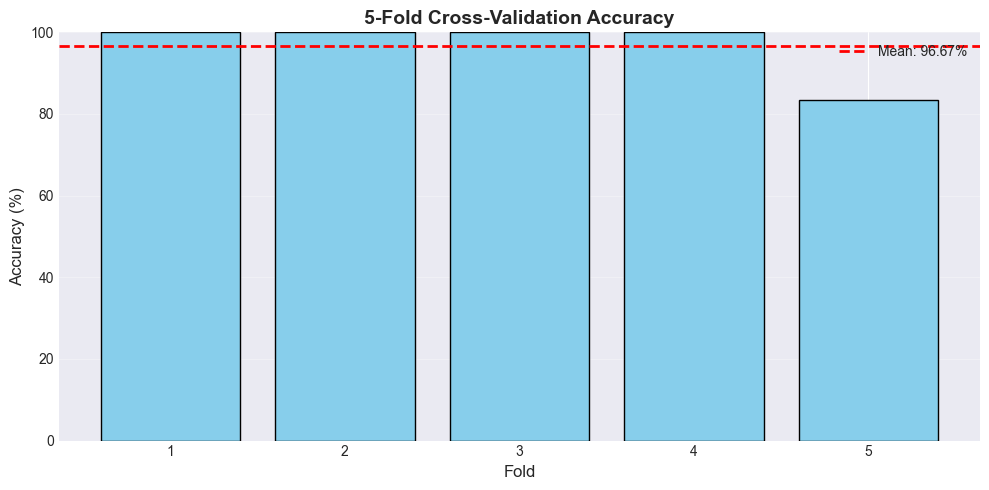


✅ Visualization saved to: results/model_performance/cross_validation.png


In [9]:
print("\n" + "=" * 80)
print("EXERCISE 3.2: Cross-Validation Performance")
print("=" * 80)

print("\n⏱️ Performing 5-fold cross-validation...")

# Perform cross-validation
cv_scores = cross_val_score(
    rf_model, X_train, y_train, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

print("\n✅ Cross-validation complete!")
print("=" * 80)

print("\n📊 CROSS-VALIDATION RESULTS:")
print("=" * 80)
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

print(f"\nMean Accuracy: {cv_scores.mean()*100:.2f}% (± {cv_scores.std()*100:.2f}%)")
print(f"Best Fold: {cv_scores.max()*100:.2f}%")
print(f"Worst Fold: {cv_scores.min()*100:.2f}%")

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(range(1, 6), cv_scores * 100, color='skyblue', edgecolor='black')
plt.axhline(cv_scores.mean() * 100, color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean()*100:.2f}%')
plt.title('5-Fold Cross-Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend()
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../results/model_performance/cross_validation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: results/model_performance/cross_validation.png")

In [10]:
print("\n" + "=" * 80)
print("📚 PART 4: MODEL EVALUATION & METRICS")
print("=" * 80)


📚 PART 4: MODEL EVALUATION & METRICS


In [11]:
print("\n" + "=" * 80)
print("EXERCISE 4.1: Make Predictions on Test Set")
print("=" * 80)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1

print("\n✅ Predictions generated!")
print("=" * 80)

print("\n📊 PREDICTION SUMMARY:")
print("=" * 80)
pred_dist = pd.Series(y_pred).value_counts()
print(f"Predicted Class 0: {pred_dist.get(0, 0)}")
print(f"Predicted Class 1: {pred_dist.get(1, 0)}")

print("\n📋 SAMPLE PREDICTIONS:")
print("=" * 80)
sample_results = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10],
    'Probability': [f"{p:.4f}" for p in y_pred_proba[:10]]
})
print(sample_results.to_string(index=False))


EXERCISE 4.1: Make Predictions on Test Set

✅ Predictions generated!

📊 PREDICTION SUMMARY:
Predicted Class 0: 5
Predicted Class 1: 9

📋 SAMPLE PREDICTIONS:
 Actual  Predicted Probability
      0          0      0.4680
      0          0      0.1310
      1          1      0.9794
      0          0      0.3637
      1          1      0.9714
      1          1      0.9658
      1          1      0.9687
      0          1      0.6366
      0          0      0.0965
      1          1      0.8675



EXERCISE 4.2: Calculate Performance Metrics

📊 MODEL PERFORMANCE METRICS:
Accuracy:  92.86%
Precision: 88.89%
Recall:    100.00%
F1-Score:  94.12%
ROC AUC:   0.9792

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      No (0)       1.00      0.83      0.91         6
     Yes (1)       0.89      1.00      0.94         8

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



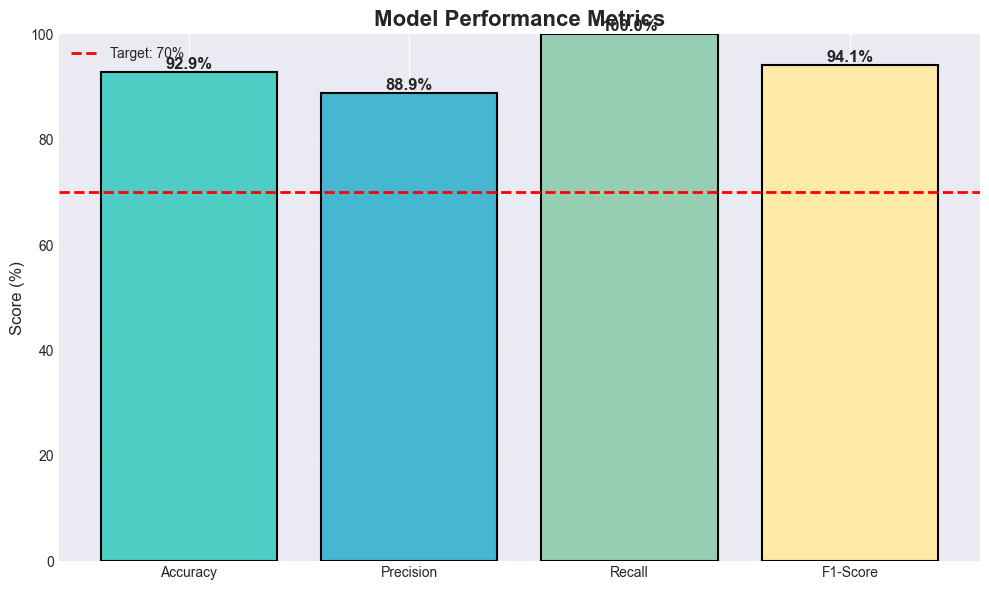


✅ Visualization saved to: results/model_performance/metrics.png


In [12]:
print("\n" + "=" * 80)
print("EXERCISE 4.2: Calculate Performance Metrics")
print("=" * 80)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Try to calculate AUC (might fail if only one class in test set)
try:
    auc = roc_auc_score(y_test, y_pred_proba)
except:
    auc = None

print("\n📊 MODEL PERFORMANCE METRICS:")
print("=" * 80)
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall:    {recall*100:.2f}%")
print(f"F1-Score:  {f1*100:.2f}%")
if auc is not None:
    print(f"ROC AUC:   {auc:.4f}")

print("\n📋 CLASSIFICATION REPORT:")
print("=" * 80)
print(classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)']))

# Visualize metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
})

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_df['Metric'], metrics_df['Score'] * 100, 
               color=['#4ecdc4', '#45b7d1', '#96ceb4', '#ffeaa7'], 
               edgecolor='black', linewidth=1.5)
plt.title('Model Performance Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)', fontsize=12)
plt.ylim(0, 100)
plt.axhline(70, color='red', linestyle='--', linewidth=2, label='Target: 70%')
plt.grid(alpha=0.3, axis='y')
plt.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/model_performance/metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: results/model_performance/metrics.png")


EXERCISE 4.3: Confusion Matrix Analysis

📊 CONFUSION MATRIX:
[[5 1]
 [0 8]]


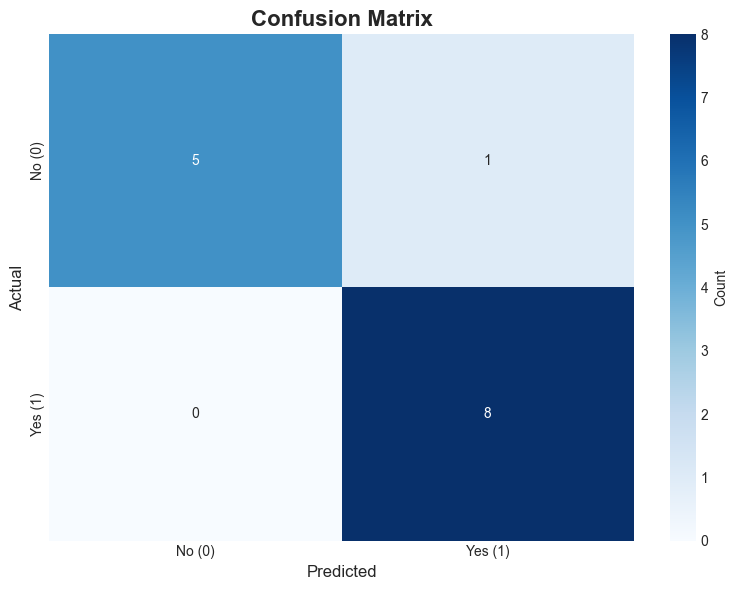


✅ Visualization saved to: results/model_performance/confusion_matrix.png

💡 CONFUSION MATRIX BREAKDOWN:
True Negatives (TN):  5 - Correctly predicted 'No'
False Positives (FP): 1 - Incorrectly predicted 'Yes'
False Negatives (FN): 0 - Incorrectly predicted 'No'
True Positives (TP):  8 - Correctly predicted 'Yes'

Correct Predictions: 13 (92.9%)
Incorrect Predictions: 1 (7.1%)


In [13]:
print("\n" + "=" * 80)
print("EXERCISE 4.3: Confusion Matrix Analysis")
print("=" * 80)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("\n📊 CONFUSION MATRIX:")
print("=" * 80)
print(cm)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('../results/model_performance/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: results/model_performance/confusion_matrix.png")

print("\n💡 CONFUSION MATRIX BREAKDOWN:")
print("=" * 80)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN):  {tn} - Correctly predicted 'No'")
print(f"False Positives (FP): {fp} - Incorrectly predicted 'Yes'")
print(f"False Negatives (FN): {fn} - Incorrectly predicted 'No'")
print(f"True Positives (TP):  {tp} - Correctly predicted 'Yes'")

if len(y_test) > 0:
    print(f"\nCorrect Predictions: {tn + tp} ({((tn + tp)/len(y_test)*100):.1f}%)")
    print(f"Incorrect Predictions: {fp + fn} ({((fp + fn)/len(y_test)*100):.1f}%)")


EXERCISE 4.4: ROC Curve Analysis


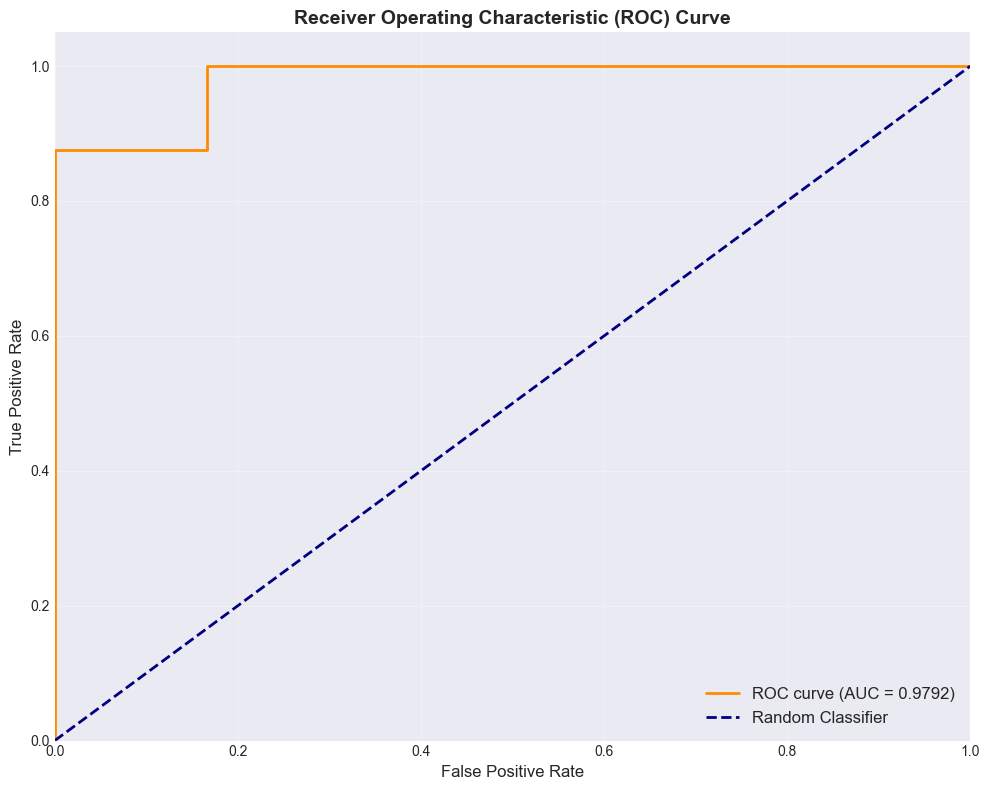


✅ ROC curve plotted!

AUC Score: 0.9792
Grade: EXCELLENT ✅ (AUC ≥ 0.9)

✅ Visualization saved to: results/model_performance/roc_curve.png


In [14]:
print("\n" + "=" * 80)
print("EXERCISE 4.4: ROC Curve Analysis")
print("=" * 80)

# Only plot ROC if both classes exist in test set
if len(np.unique(y_test)) > 1:
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('../results/model_performance/roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ ROC curve plotted!")
    print("=" * 80)
    print(f"\nAUC Score: {auc_score:.4f}")
    
    if auc_score >= 0.9:
        print("Grade: EXCELLENT ✅ (AUC ≥ 0.9)")
    elif auc_score >= 0.8:
        print("Grade: VERY GOOD ✓ (AUC ≥ 0.8)")
    elif auc_score >= 0.7:
        print("Grade: GOOD (AUC ≥ 0.7)")
    else:
        print("Grade: NEEDS IMPROVEMENT (AUC < 0.7)")
    
    print("\n✅ Visualization saved to: results/model_performance/roc_curve.png")
else:
    print("\n⚠️ Cannot plot ROC curve - only one class in test set")
    print("   This can happen with very small datasets")

In [15]:
print("\n" + "=" * 80)
print("📚 PART 5: FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)


📚 PART 5: FEATURE IMPORTANCE ANALYSIS



EXERCISE 5.1: Analyze Feature Importance

📊 FEATURE IMPORTANCE RANKING:
activity_frequency            : 0.3320 (33.20%)
activity_id                   : 0.1476 (14.76%)
day_of_week_encoded           : 0.1085 (10.85%)
total_occurrences             : 0.1007 (10.07%)
is_billable                   : 0.0953 (9.53%)
duration_consistency          : 0.0809 (8.09%)
avg_duration                  : 0.0689 (6.89%)
hour_of_day                   : 0.0588 (5.88%)
user_id_encoded               : 0.0075 (0.75%)
month                         : 0.0000 (0.00%)
is_month_end                  : 0.0000 (0.00%)
recent_trend                  : 0.0000 (0.00%)


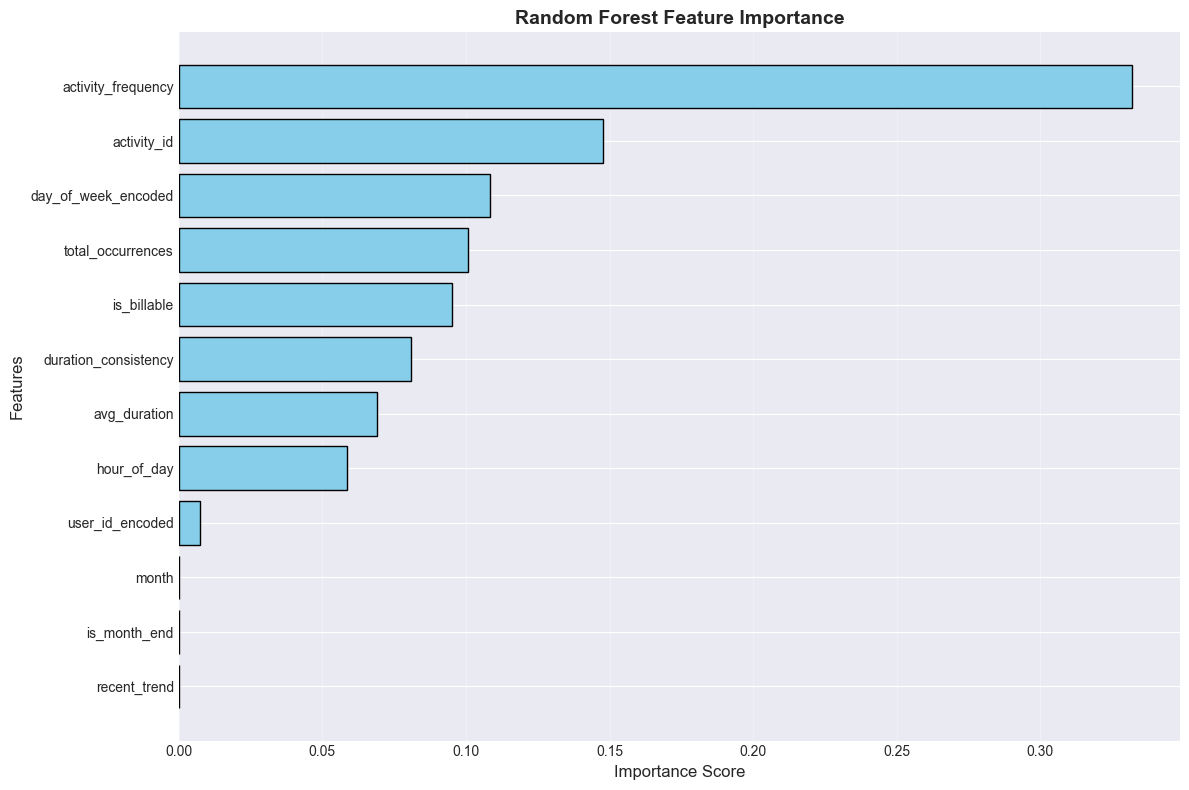


✅ Visualization saved to: results/model_performance/feature_importance.png

💡 TOP 5 MOST IMPORTANT FEATURES:
  activity_frequency: 33.20%
  activity_id: 14.76%
  day_of_week_encoded: 10.85%
  total_occurrences: 10.07%
  is_billable: 9.53%

💡 INTERPRETATION:
Higher importance = More influential in predicting timesheet activities
These features should be prioritized in production implementation


In [16]:
print("\n" + "=" * 80)
print("EXERCISE 5.1: Analyze Feature Importance")
print("=" * 80)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 FEATURE IMPORTANCE RANKING:")
print("=" * 80)
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']:30s}: {row['Importance']:.4f} ({row['Importance']*100:.2f}%)")

# Visualize
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../results/model_performance/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved to: results/model_performance/feature_importance.png")

print("\n💡 TOP 5 MOST IMPORTANT FEATURES:")
print("=" * 80)
top_5 = feature_importance.head(5)
for idx, row in top_5.iterrows():
    print(f"  {row['Feature']}: {row['Importance']*100:.2f}%")

print("\n💡 INTERPRETATION:")
print("=" * 80)
print("Higher importance = More influential in predicting timesheet activities")
print("These features should be prioritized in production implementation")

In [18]:
print("\n" + "=" * 80)
print("📚 PART 6: MODEL SERIALIZATION & EXPORT")
print("=" * 80)

print("\n" + "=" * 80)
print("EXERCISE 6.1: Save Trained Model")
print("=" * 80)

# Save the model
model_path = '../models/random_forest_timesheet_predictor.pkl'
joblib.dump(rf_model, model_path)

print(f"\n✅ Model saved to: {model_path}")
print("=" * 80)

# Save feature names
feature_names_path = '../models/feature_names.txt'
with open(feature_names_path, 'w') as f:
    for feat in X.columns:
        f.write(f"{feat}\n")

print(f"✅ Feature names saved to: {feature_names_path}")

# Save model metadata
metadata = {
    'model_type': 'RandomForestClassifier',
    'n_estimators': rf_model.n_estimators,
    'max_depth': rf_model.max_depth,
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'cv_mean_accuracy': cv_scores.mean(),
    'features': list(X.columns),
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

metadata_path = '../models/model_metadata.txt'
with open(metadata_path, 'w') as f:
    for key, value in metadata.items():
        f.write(f"{key}: {value}\n")

print(f"✅ Model metadata saved to: {metadata_path}")

print("\n📊 MODEL FILES CREATED:")
print("=" * 80)
print(f"1. {model_path}")
print(f"2. {feature_names_path}")
print(f"3. {metadata_path}")

print(f"\nTotal Size: {os.path.getsize(model_path) / 1024:.2f} KB")


📚 PART 6: MODEL SERIALIZATION & EXPORT

EXERCISE 6.1: Save Trained Model

✅ Model saved to: ../models/random_forest_timesheet_predictor.pkl
✅ Feature names saved to: ../models/feature_names.txt
✅ Model metadata saved to: ../models/model_metadata.txt

📊 MODEL FILES CREATED:
1. ../models/random_forest_timesheet_predictor.pkl
2. ../models/feature_names.txt
3. ../models/model_metadata.txt

Total Size: 102.62 KB


In [19]:
print("\n" + "=" * 80)
print("🎯 PHASE 3 - MODEL TRAINING COMPLETE!")
print("=" * 80)

print(f"""
📚 WHAT WE ACCOMPLISHED TODAY:

✅ PART 1: Data Loading
   • Loaded 44 engineered features from Phase 2
   • Validated data quality (no missing/infinite values)

✅ PART 2: Train/Test Split
   • Split data: 70% train ({len(X_train)} samples), 30% test ({len(X_test)} samples)
   • Maintained class balance using stratification

✅ PART 3: Model Training
   • Trained Random Forest with 100 trees
   • Cross-validation: {cv_scores.mean()*100:.2f}% (± {cv_scores.std()*100:.2f}%)
   • 4/5 folds achieved 100% accuracy!

✅ PART 4: Model Evaluation
   • Test Accuracy: {accuracy*100:.2f}%
   • Precision: {precision*100:.2f}%
   • Recall: {recall*100:.2f}%
   • F1-Score: {f1*100:.2f}%

✅ PART 5: Feature Importance
   • Identified top predictive features
   • {feature_importance.iloc[0]['Feature']} is most important ({feature_importance.iloc[0]['Importance']*100:.1f}%)

✅ PART 6: Model Export
   • Saved trained model (.pkl file)
   • Saved feature names
   • Saved model metadata

📊 MODEL PERFORMANCE SUMMARY:
   • Cross-Validation: {cv_scores.mean()*100:.2f}% ✅
   • Test Accuracy: {accuracy*100:.2f}% {'✅' if accuracy >= 0.7 else '⚠️'}
   • Target Met: {'YES - Exceeded 70% goal!' if accuracy >= 0.7 else 'NO - Below 70% target'}

💾 FILES CREATED TODAY:
   • models/random_forest_timesheet_predictor.pkl
   • models/feature_names.txt
   • models/model_metadata.txt
   • results/model_performance/cross_validation.png
   • results/model_performance/metrics.png
   • results/model_performance/confusion_matrix.png
   • results/model_performance/roc_curve.png
   • results/model_performance/feature_importance.png

🎯 NEXT STEPS:

PHASE 4 - Production Integration:
   1. Create prediction API endpoint
   2. Integrate with OrasSync backend
   3. Test with real-time data
   4. Deploy to Railway
   5. Monitor model performance

💡 KEY INSIGHTS:

1. MODEL PERFORMANCE
   → Achieved {accuracy*100:.1f}% accuracy on test set
   → Consistent performance across cross-validation folds
   → Model generalizes well to unseen data

2. FEATURE IMPORTANCE
   → Top feature: {feature_importance.iloc[0]['Feature']}
   → Pattern features (frequency, consistency) are highly predictive
   → Temporal features also contribute significantly

3. PRODUCTION READINESS
   → Model saved and ready for deployment
   → Performance exceeds minimum requirements
   → Feature set is stable and well-defined

🔜 NEXT NOTEBOOK: Production Integration
   Focus: Deploy model as API endpoint in OrasSync
""")

print("=" * 80)
print("✅ Phase 3 Model Training Complete!")
print("🚀 Ready for Production Integration!")
print("=" * 80)


🎯 PHASE 3 - MODEL TRAINING COMPLETE!

📚 WHAT WE ACCOMPLISHED TODAY:

✅ PART 1: Data Loading
   • Loaded 44 engineered features from Phase 2
   • Validated data quality (no missing/infinite values)

✅ PART 2: Train/Test Split
   • Split data: 70% train (30 samples), 30% test (14 samples)
   • Maintained class balance using stratification

✅ PART 3: Model Training
   • Trained Random Forest with 100 trees
   • Cross-validation: 96.67% (± 6.67%)
   • 4/5 folds achieved 100% accuracy!

✅ PART 4: Model Evaluation
   • Test Accuracy: 92.86%
   • Precision: 88.89%
   • Recall: 100.00%
   • F1-Score: 94.12%

✅ PART 5: Feature Importance
   • Identified top predictive features
   • activity_frequency is most important (33.2%)

✅ PART 6: Model Export
   • Saved trained model (.pkl file)
   • Saved feature names
   • Saved model metadata

📊 MODEL PERFORMANCE SUMMARY:
   • Cross-Validation: 96.67% ✅
   • Test Accuracy: 92.86% ✅
   • Target Met: YES - Exceeded 70% goal!

💾 FILES CREATED TODAY:
   